<a href="https://colab.research.google.com/github/ramana16/EVA4/blob/master/EVA4S12/S12-TB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EVA4/S12/')
%reload_ext autoreload
%autoreload 2

import numpy as np
import json
import pprint

from annotater import Annotater



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [4]:
in_path = "/content/gdrive/My Drive/Colab Notebooks/EVA4/S12/data/annotations/annotations_dogs.json"
with open(in_path, 'r') as f:
			annotations = json.load(f)
print(annotations.keys(), "\n")
pprint.pprint(annotations["images"][0])
print()
pprint.pprint(annotations["annotations"][0])
print()
pprint.pprint(annotations["categories"][0])

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories']) 

{'date_captured': '',
 'file_name': 'dog_0.jpg',
 'height': 183,
 'id': 0,
 'license': 1,
 'width': 275}

{'area': 32041,
 'bbox': [2, 2, 179, 179],
 'category_id': 1,
 'id': 0,
 'image_id': '0',
 'iscrowd': 0,
 'segmentation': [2, 2, 181, 2, 181, 181, 2, 181]}

{'id': 1, 'name': 'dog', 'supercategory': 'class'}


In [5]:
in_path = "/content/gdrive/My Drive/Colab Notebooks/EVA4/S12/data/annotations/annotations_dogs.json"
out_path = "/content/gdrive/My Drive/Colab Notebooks/EVA4/S12/data/annotations/bboxes_dogs.csv"
ant = Annotater(in_path, out_path)

Saved image bbox data at: /content/gdrive/My Drive/Colab Notebooks/EVA4/S12/data/annotations/bboxes_dogs.csv

Showing the first few rows of generated bbox data:

    img_name class  img_h  ...  bbox_scaled_y  bbox_scaled_w  bbox_scaled_h
0  dog_0.jpg   dog    183  ...       0.010929       0.650909       0.978142
1  dog_1.jpg   dog    183  ...       0.087432       0.730909       0.896175
2  dog_2.jpg   dog    168  ...       0.000000       0.783333       0.988095
3  dog_3.jpg   dog    174  ...       0.126437       0.294118       0.764368
4  dog_4.jpg   dog    183  ...       0.065574       0.949091       0.874317

[5 rows x 12 columns]


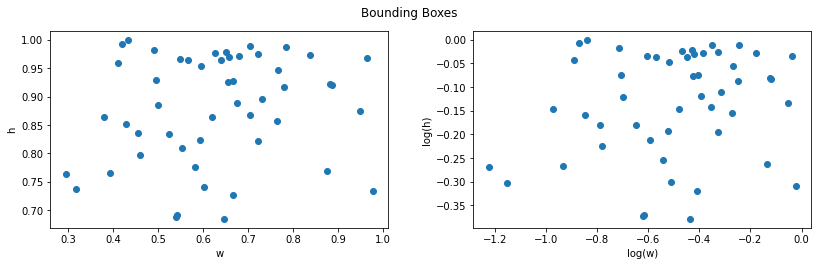

In [6]:
ant.show_bboxes()

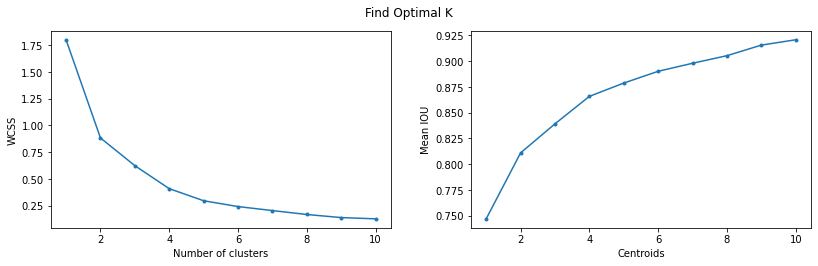

In [7]:
ks = [i for i in range(1,11)]
ant.fit_compare(ks)

In [8]:

ks = [3,4,5,6,7,8]
for k in ks:
  miou = ant.kmeans_map[k]["mean_iou"]
  print("Mean IOU for %s: %s" % (k, miou))

Mean IOU for 3: 0.8391543070114013
Mean IOU for 4: 0.8658102565543397
Mean IOU for 5: 0.8786993110742413
Mean IOU for 6: 0.8901302636018044
Mean IOU for 7: 0.8979057995199584
Mean IOU for 8: 0.9052679601295067


Centroids: [[0.58260932 0.75270229]
 [0.91004486 0.87959827]
 [0.38918022 0.80225897]
 [0.4823328  0.95953503]
 [0.69143415 0.93029017]]
Mean IOU: 0.8786993110742413


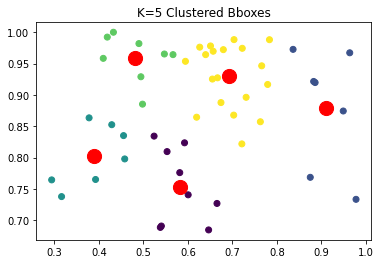

In [9]:
ant.show_k(5)

Centroids: [[0.92232506 0.86408505]
 [0.38918022 0.80225897]
 [0.64459123 0.94761572]
 [0.58260932 0.75270229]
 [0.7561316  0.91567642]
 [0.47028511 0.95885636]]
Mean IOU: 0.8901302636018044


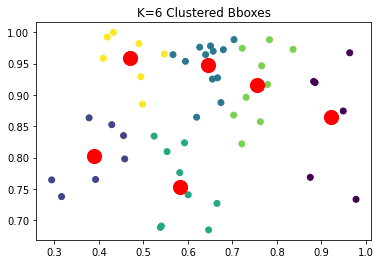

In [10]:
ant.show_k(6)

Let us show some of the training images, for fun.



Centroids: [[0.64857487 0.95483271]
 [0.38918022 0.80225897]
 [0.88347826 0.94057948]
 [0.58260932 0.75270229]
 [0.73395483 0.88481587]
 [0.47028511 0.95885636]
 [0.92638889 0.75090312]]
Mean IOU: 0.8979057995199584


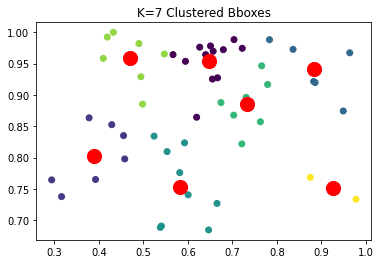

In [11]:
ant.show_k(7)

Centroids: [[0.7381377  0.90624059]
 [0.46563565 0.97112477]
 [0.34534759 0.78262201]
 [0.50159179 0.83397836]
 [0.92638889 0.75090312]
 [0.90350725 0.93107633]
 [0.59556573 0.71784047]
 [0.64187965 0.9530576 ]]
Mean IOU: 0.9052679601295067


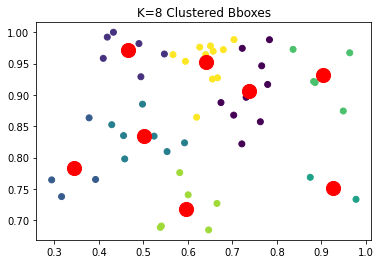

In [12]:
ant.show_k(8)